<a href="https://colab.research.google.com/github/ArdaKn/DSA210/blob/main/DSA210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load raw data
gas = pd.read_csv('gas_prices.csv')
passengers = pd.read_csv('monthly_passenger_counts.csv')
weather = pd.read_csv('Monthly_Weather_Summary.csv')

# Format month columns
gas['date'] = pd.to_datetime(gas['date'])
gas['month'] = gas['date'].dt.to_period('M').astype(str)

weather['datetime'] = pd.to_datetime(weather['datetime'])
weather['month'] = weather['datetime'].dt.to_period('M').astype(str)
weather = weather[['month', 'temp', 'precip']]
weather.columns = ['month', 'avg_temp', 'total_precip']

passengers['month'] = pd.date_range(start='2022-01-01', periods=len(passengers), freq='M').to_period('M').astype(str)

# Merge them
merged = pd.merge(passengers, gas[['month', 'gas_price', 'percent_change']], on='month', how='left')
merged = pd.merge(merged, weather, on='month', how='left')

<ipython-input-28-f5d75371795c>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  passengers['month'] = pd.date_range(start='2022-01-01', periods=len(passengers), freq='M').to_period('M').astype(str)


In [29]:
# Load raw data
gas = pd.read_csv('gas_prices.csv')
passengers = pd.read_csv('monthly_passenger_counts.csv')
weather = pd.read_csv('Monthly_Weather_Summary.csv')

# Format month columns
gas['date'] = pd.to_datetime(gas['date'])
gas['month'] = gas['date'].dt.to_period('M').astype(str)

weather['datetime'] = pd.to_datetime(weather['datetime'])
weather['month'] = weather['datetime'].dt.to_period('M').astype(str)
weather = weather[['month', 'temp', 'precip']]
weather.columns = ['month', 'avg_temp', 'total_precip']

passengers['month'] = pd.date_range(start='2022-01-01', periods=len(passengers), freq='M').to_period('M').astype(str)

# Merge them
merged = pd.merge(passengers, gas[['month', 'gas_price', 'percent_change']], on='month', how='left')
merged = pd.merge(merged, weather, on='month', how='left')

<ipython-input-29-3862926fbfaa>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  passengers['month'] = pd.date_range(start='2022-01-01', periods=len(passengers), freq='M').to_period('M').astype(str)


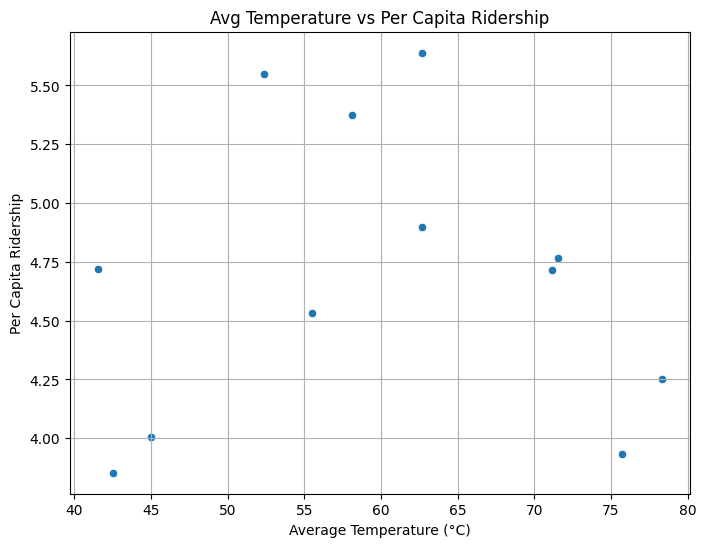

In [30]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged['avg_temp'], y=merged['per_capita_ridership'], marker='o')
plt.title('Avg Temperature vs Per Capita Ridership')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Per Capita Ridership')
plt.grid(True)
plt.savefig('scatterplot_temp_vs_ridership.png')
plt.show()
plt.close()

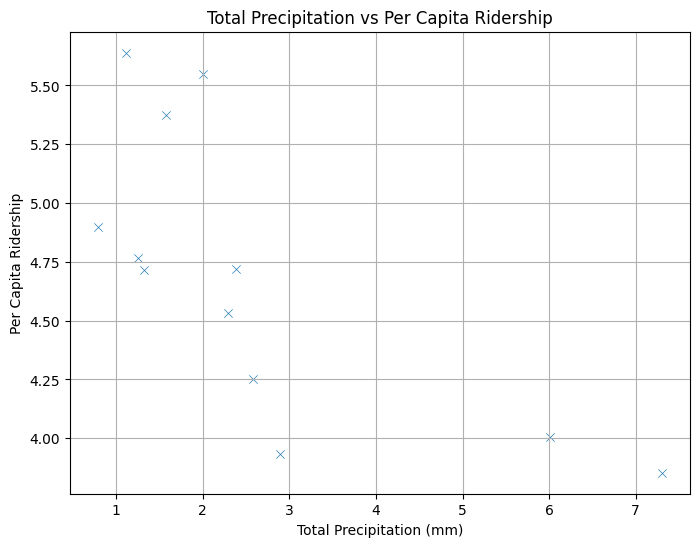

In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged['total_precip'], y=merged['per_capita_ridership'], marker='x')
plt.title('Total Precipitation vs Per Capita Ridership')
plt.xlabel('Total Precipitation (mm)')
plt.ylabel('Per Capita Ridership')
plt.grid(True)
plt.savefig('scatterplot_precip_vs_ridership.png')
plt.show()
plt.close()

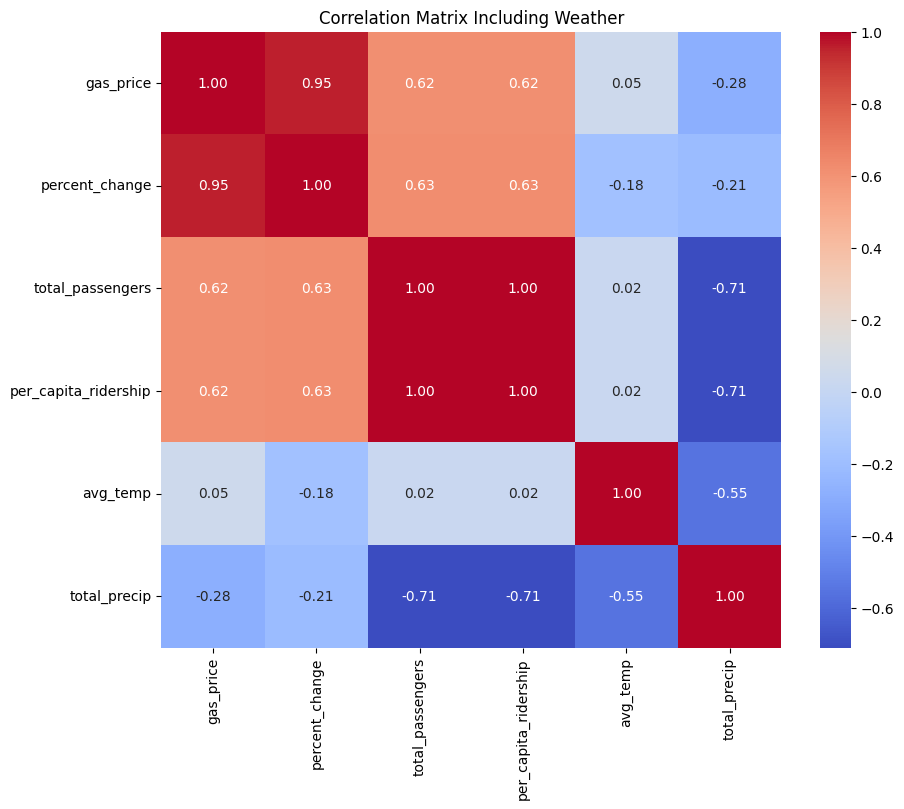

In [32]:
corr_vars = ['gas_price', 'percent_change', 'total_passengers', 'per_capita_ridership', 'avg_temp', 'total_precip']
correlation_matrix = merged[corr_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Weather')
plt.savefig('correlation_with_weather.png')
plt.show()
plt.close()


In [33]:
pearson_temp, p_temp = pearsonr(merged['avg_temp'], merged['per_capita_ridership'])
pearson_precip, p_precip = pearsonr(merged['total_precip'], merged['per_capita_ridership'])

print("--- Weather Hypothesis Testing Results ---")
print(f"Temperature vs Ridership: Pearson r = {pearson_temp:.3f}, p = {p_temp:.4f}")
if p_temp < 0.05:
    print("→ Statistically significant correlation with temperature.")
else:
    print("→ No significant correlation with temperature.")

print(f"Precipitation vs Ridership: Pearson r = {pearson_precip:.3f}, p = {p_precip:.4f}")
if p_precip < 0.05:
    print("→ Statistically significant correlation with precipitation.")
else:
    print("→ No significant correlation with precipitation.")


--- Weather Hypothesis Testing Results ---
Temperature vs Ridership: Pearson r = 0.019, p = 0.9535
→ No significant correlation with temperature.
Precipitation vs Ridership: Pearson r = -0.709, p = 0.0098
→ Statistically significant correlation with precipitation.


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Select only needed columns
data = merged[['gas_price', 'avg_temp', 'total_precip', 'per_capita_ridership']].copy()

# Convert all columns to numeric (force conversion of empty strings, bad values to NaN)
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values
data = data.dropna()

# Features and target
X = data[['gas_price', 'avg_temp', 'total_precip']]
y = data['per_capita_ridership']

# Check we have enough rows left
print(f"Training with {len(data)} rows")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

print("--- Linear Regression Results ---")
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Training with 12 rows
--- Linear Regression Results ---
R² Score: 0.6281424102987982
Mean Squared Error: 0.23020863365423072
Coefficients: [ 0.23402457 -0.01967276 -0.24288542]
Intercept: 4.556211982554542
